In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [49]:
plt.rcParams['font.size'] = 19
plt.rcParams['axes.linewidth'] = 1.5

# 1ª Sessão

## Calibração

In [54]:
def img_to_matrix(img):
    width, height = img.size
    pixels = img.load() #returns dictionary where each entry has rgb values
    
    matrix = list()
    row  = list()
    for y in range(height):
        row = []
        for x in range(width):
            row += [pixels[x, y]]
        matrix.append(row)
    return matrix

def soma_linhas(pixels):
    soma = list()
    for i in range(width):
        soma += [0]
    for i in range(height):
        for j in range(width):
            soma[j] += pixels[i][j]
    return soma
            

## 1mm

    Não me posso esquecer de ter em conta a inclinação da cena!

In [55]:
img_path = '/Users/thomasgaehtgens/Desktop/1a_sessao/craveira_1mm.tif'

In [56]:
img = Image.open(img_path)
width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

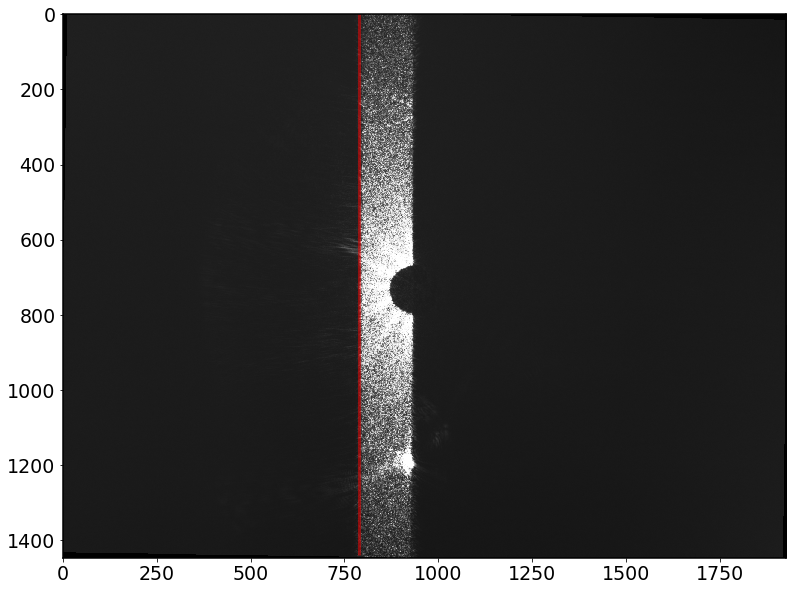

In [57]:
fig     = plt.figure(figsize=(20, 10))

rotated = img.rotate(-0.9)

plt.imshow(rotated, cmap='gray', zorder=1)

plt.vlines(790, 0, 1440, color='red', lw=3, zorder=2, alpha=0.5)

img = rotated

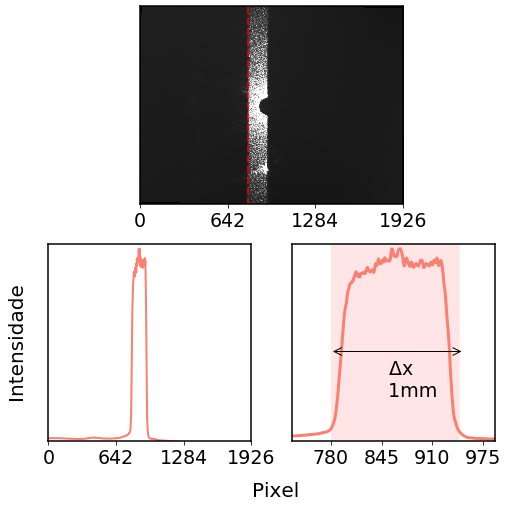

In [58]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(2, 2, (1, 2))
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(65))

ax1.imshow(img, cmap='gray')
ax1.vlines(790, 0, 1440, color='red', lw=2, zorder=2, linestyles='--', alpha=0.7)
#ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)


ax2.plot(linha, color='salmon', lw=2)
ax2.yaxis.set_visible(False)
ax2.set_xlim(0, 1928)
ax2.set_ylim(1e7, 5.4e7)

areay = np.linspace(-1e7, 10e7, width)

ax3.fill_betweenx(areay, 780, 945, facecolor ='red', alpha = 0.1)

ax3.annotate(r'', xy=(780, 3e7), xytext=(950, 3e7),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax3.annotate(r'   $\Delta$x' + "\n   " + '1mm', xy=(830, 2e7))

ax3.plot(linha, color='salmon', lw=3)
ax3.yaxis.set_visible(False)
ax3.set_xlim(730, 990)
ax3.set_ylim(1e7, 5.4e7)

fig.text(0.52, 0.04, 'Pixel', ha='center', va='center', fontsize=20)
fig.text(0.07, 0.3, 'Intensidade', ha='center', va='center', rotation='vertical', fontsize=20)

plt.savefig('1mm.pdf', hbox='tight_layout')

## 2mm

In [1]:
img_path = '/Users/thomasgaehtgens/Desktop/1a_sessao/craveira_2mm.tif'

In [131]:
img = Image.open(img_path)
width, height = img.size

pixels = img_to_matrix(img)
linha = soma_linhas(pixels)

Rodar a imagem para ficar direita

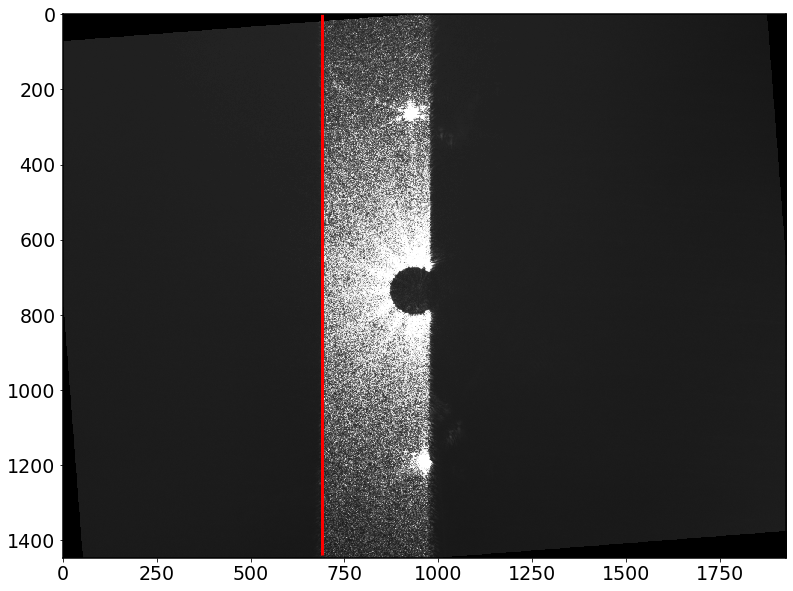

In [132]:
fig     = plt.figure(figsize=(20, 10))

rotated = img.rotate(4.4)

plt.imshow(rotated, cmap='gray', zorder=1)

plt.vlines(690, 0, 1440, color='red', lw=3, zorder=2)

img = rotated

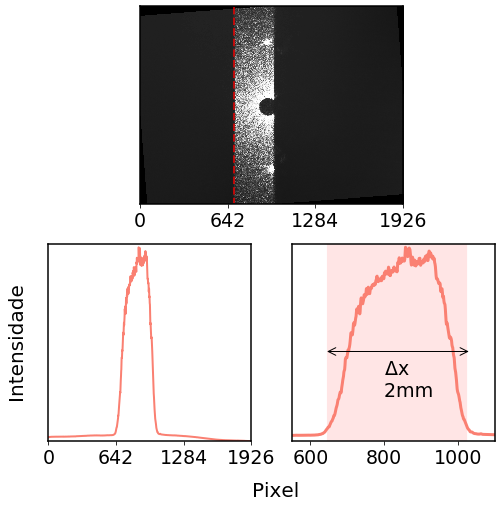

In [133]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(2, 2, (1, 2))
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

ax1.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
ax2.xaxis.set_major_locator(mpl.ticker.MultipleLocator(642))
#ax3.xaxis.set_major_locator(mpl.ticker.MultipleLocator(65))

ax1.imshow(img, cmap='gray')
ax1.vlines(690, 0, 1440, color='red', lw=2, zorder=2, linestyles='--', alpha=0.7)
#ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)


ax2.plot(linha, color='salmon', lw=2)
ax2.yaxis.set_visible(False)
ax2.set_xlim(0, 1928)
ax2.set_ylim(1e7, 5.4e7)

areay = np.linspace(-1e7, 10e7, width)

ax3.fill_betweenx(areay, 645, 1025, facecolor ='red', alpha = 0.1)

ax3.annotate(r'', xy=(640, 3e7), xytext=(1035, 3e7),
            arrowprops={'arrowstyle': '<->'}, va='center')
ax3.annotate(r'   $\Delta$x' + "\n   " + '2mm', xy=(750, 2e7))

ax3.plot(linha, color='salmon', lw=3)
ax3.yaxis.set_visible(False)
ax3.set_xlim(550, 1100)
ax3.set_ylim(1e7, 5.4e7)

fig.text(0.52, 0.04, 'Pixel', ha='center', va='center', fontsize=20)
fig.text(0.07, 0.3, 'Intensidade', ha='center', va='center', rotation='vertical', fontsize=20)

plt.savefig('2mm.pdf', hbox='tight_layout')

# RONCHI

In [35]:
def ronchi(x, A, a, d, M):
    v = x
    return A*((np.sin(np.pi*a*v)**2)/((np.pi*v)**2))*((np.sin(np.pi*M*d*v)**2)/np.sin((np.pi*d*v))**2)

(1e-07, 60)

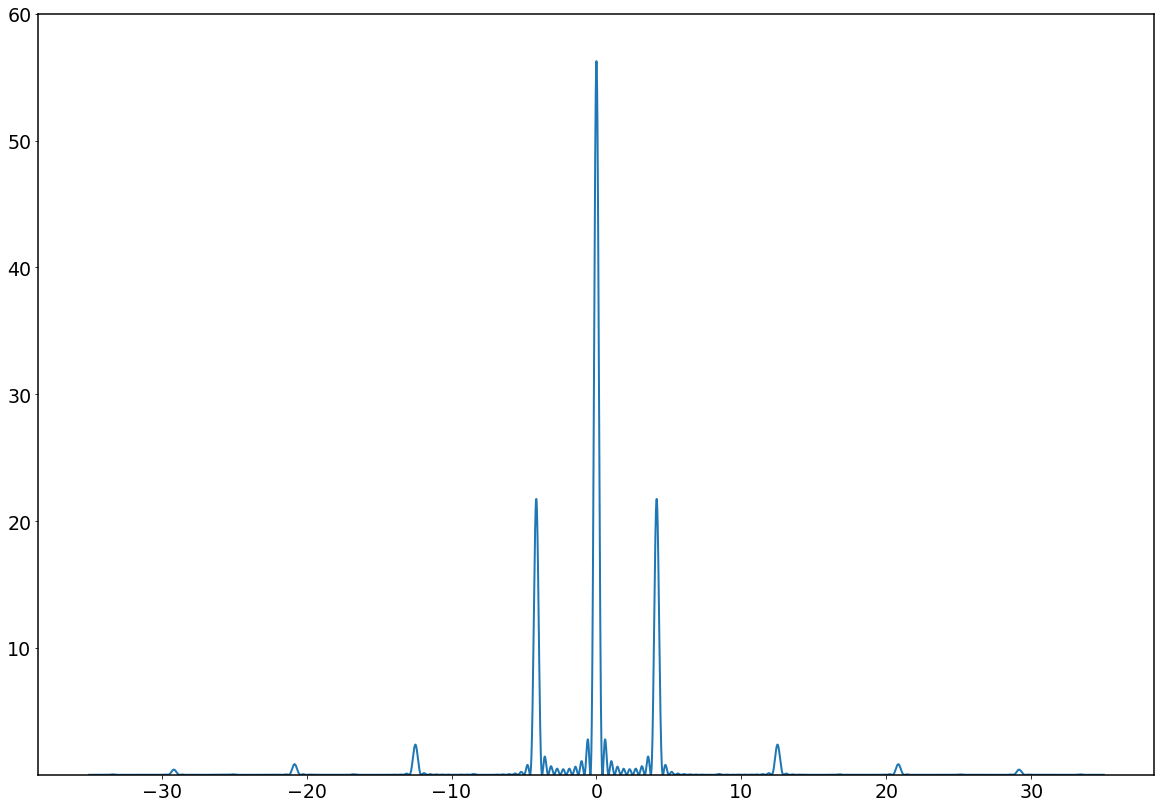

In [44]:
fig = plt.figure(figsize=(20, 14))

A=37.19
a=0.123
d=0.240
M=10

x = np.linspace(-35, 35, 100000)

ax = plt.gca()
ax.plot(x, ronchi(x, A, a, d, M), lw=2)
#ax.set_yscale('log')
ax.set_ylim(10**(-7), 60)

In [59]:
imgs = ['2mmexposed.tif', '5mm.tif', '5mmexposed.tif', '10mm2.tif', '10mmexposed.tif', '15mm.tif' ,'15mmexposed.tif', '20mm.tif']
for i in range(len(imgs)):
    imgs[i] = '/Users/thomasgaehtgens/Desktop/1a_sessao/ronchibons/' + imgs[i]

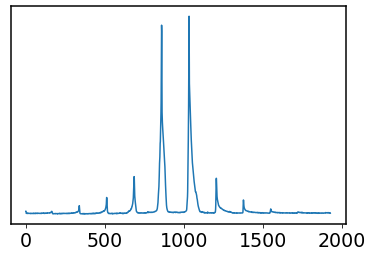

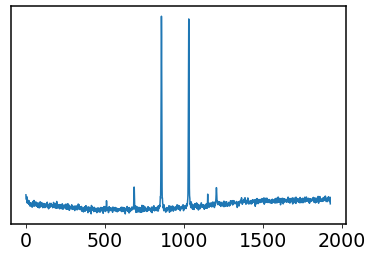

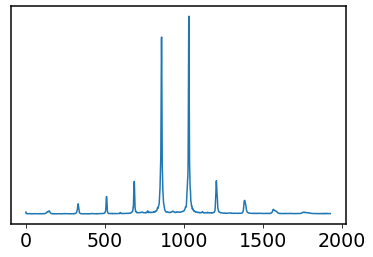

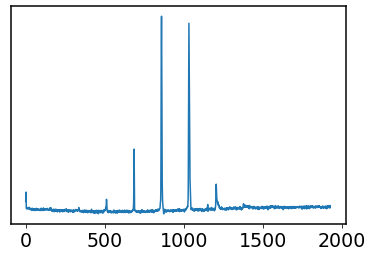

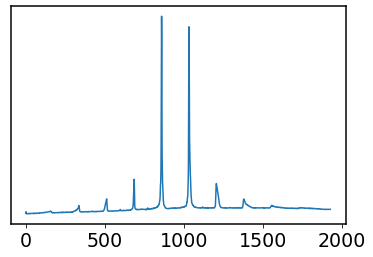

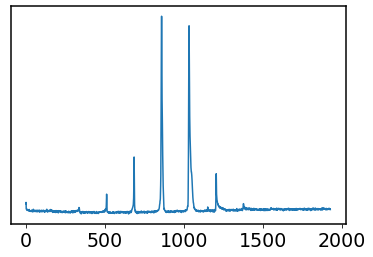

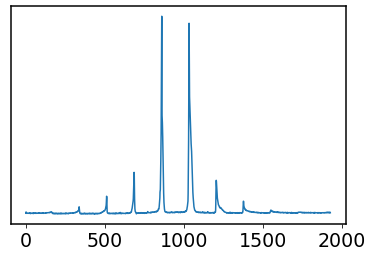

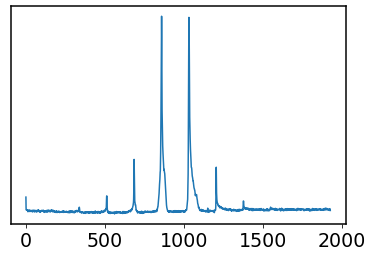

In [60]:
for img_path in imgs:
    fig=plt.figure()
    im = Image.open(img_path)

    pixels = img_to_matrix(im)
    linha = soma_linhas(pixels)
    
    plt.plot(linha)
    ax = plt.gca()
    ax.yaxis.set_visible(False)
    
    plt.savefig('teste.pdf')
    #plt.imshow(im, cmap='gray')

# TEM's

Calculates pixel coordinates

In [ ]:
import cv2
import numpy as np

coords = []
# Picture path
img = cv2.imread('/Users/thomasgaehtgens/Downloads/grupo5b/tem2exposed.tif')
a = []
b = []
 
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        a.append(x)
        b.append(y)
        cv2.circle(img, (x, y), 1, (0, 0, 255), thickness=-1)
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    fontScale=2, color=(255, 255, 255), thickness=4)
        cv2.imshow("image", img)
        print(x,y)
 
 
cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
cv2.imshow("image", img)
cv2.waitKey(0)
print(a[0], b[0])

coords += [[a[0],  b[0]]]


690 199
953 203


# TEMI

In [1]:
coords = [
[606,    365],
[781,    371],
[956,    373],
[1130,   371],
[1313,   371],
    
[604,    542],
[776,    547],
[948,    546],
[1126,   551],
[1302,   552],
#[49,     713],
#[241,    715],
[599,    717],
[772,    720],
[1119,   727],
[1297,   733],
#[1673,   742],
[596,    898],
[769,    900],
[943,    900],
[1117,   908],
[1294,   912],
  
[591,   1079],   
[765,   1081],
[937,   1082],
[1116,  1086],
[1294,  1098]
]

In [5]:
colunas = [5, 5, 4, 5, 5]
linha   = []
matriz  = []

count = 0
for i in coords:
    if count == colunas[0] - 1:
        linha.append(i)
        colunas.pop(0)
        count = 0
        matriz.append(linha)
        linha = []
    else:
        count += 1
        linha.append(i)

### Distância horizontal

In [6]:
dist_h = []

for i in matriz:
    for j in range(len(i) - 1):
        dist_h.append(i[j + 1][0] - i[j][0])        

In [7]:
dist_h

[175,
 175,
 174,
 183,
 172,
 172,
 178,
 176,
 173,
 347,
 178,
 173,
 174,
 174,
 177,
 174,
 172,
 179,
 178]

In [8]:
dist_h.pop(dist_h.index(max(dist_h)))

347

In [9]:
avg = 0
for i in dist_h:
    avg += i
avg /= len(dist_h)

In [10]:
round(avg, 2) #in pixels

175.39

### Distância vertical

Inverter a matriz com as coordenadas dos pontos

In [11]:
max_len = 0
for i in matriz:
    if len(i) > max_len:
        max_len = len(i)
print(max_len)

5


In [12]:
for i in range(len(matriz)):
    if (len(matriz[i])%2 == 0):
        meio = int(len(matriz[i])/2)
        matriz[i] = matriz[i][:meio] + [0] + matriz[i][meio:]
        
    else:
        while len(matriz[i]) < max_len:
            matriz[i] = [0] + matriz[i] + [0]
            
t_matriz = [[matriz[j][i] for j in range(len(matriz))] for i in range(len(matriz[0]))]

for i in t_matriz:
    for j in i:
        if j == 0:
            i.pop(i.index(j))

In [13]:
t_matriz

[[[606, 365], [604, 542], [599, 717], [596, 898], [591, 1079]],
 [[781, 371], [776, 547], [772, 720], [769, 900], [765, 1081]],
 [[956, 373], [948, 546], [943, 900], [937, 1082]],
 [[1130, 371], [1126, 551], [1119, 727], [1117, 908], [1116, 1086]],
 [[1313, 371], [1302, 552], [1297, 733], [1294, 912], [1294, 1098]]]

In [14]:
dist_v = []

for i in t_matriz:
    for j in range(len(i) - 1):
        dist_v.append(i[j + 1][1] - i[j][1])   

In [15]:
dist_v.pop(dist_v.index(max(dist_v)))

354

In [16]:
avg = 0
for i in dist_v:
    avg += i
avg /= len(dist_v)

In [17]:
round(avg, 2) #in pixels

178.94

# TEMII

In [3]:
coords = [
[ 420,  189  ],
[ 691,  200  ],
[ 954,  201  ],
[1221, 201   ],
[1498,  194  ],
    
[ 422, 454   ],
[ 686, 458   ],   
[ 946, 462   ],
[1210, 465   ],
[1484, 470   ],
#[ 144, 714   ],
    
[ 422, 716   ],
[ 685, 717   ],
[1204, 723   ],
[1477, 733   ],
    
#[1770, 739   ],
[ 415, 982   ],
[ 681, 981   ],
[ 941, 981   ],
[1205, 989   ],    
[1479, 1001  ],
    
[410,  1254  ],    
[ 677, 1251  ],
[ 940, 1254  ],
[1208, 1262  ],
[1485, 1276]]

In [4]:
colunas = [5, 5, 4, 5, 5]
linha   = []
matriz  = []

count = 0
for i in coords:
    if count == colunas[0] - 1:
        linha.append(i)
        colunas.pop(0)
        count = 0
        matriz.append(linha)
        linha = []
    else:
        count += 1
        linha.append(i)

### Distância horizontal

In [5]:
dist_v = []
dist_h = []

for i in matriz:
    for j in range(len(i) - 1):
        dist_h.append(i[j + 1][0] - i[j][0])        

In [6]:
dist_h.pop(dist_h.index(max(dist_h)))

519

In [7]:
dist_h

[271,
 263,
 267,
 277,
 264,
 260,
 264,
 274,
 263,
 273,
 266,
 260,
 264,
 274,
 267,
 263,
 268,
 277]

In [8]:
avg = 0
for i in dist_h:
    avg += i
avg /= len(dist_h)

In [9]:
avg #in pixels

267.5

### Distância vertical

In [10]:
max_len = 0
for i in matriz:
    if len(i) > max_len:
        max_len = len(i)
print(max_len)

5


In [11]:
for i in range(len(matriz)):
    if (len(matriz[i])%2 == 0):
        meio = int(len(matriz[i])/2)
        matriz[i] = matriz[i][:meio] + [0] + matriz[i][meio:]
        
    else:
        while len(matriz[i]) < max_len:
            matriz[i] = [0] + matriz[i] + [0]
            
t_matriz = [[matriz[j][i] for j in range(len(matriz))] for i in range(len(matriz[0]))]

for i in t_matriz:
    for j in i:
        if j == 0:
            i.pop(i.index(j))

In [12]:
t_matriz

[[[420, 189], [422, 454], [422, 716], [415, 982], [410, 1254]],
 [[691, 200], [686, 458], [685, 717], [681, 981], [677, 1251]],
 [[954, 201], [946, 462], [941, 981], [940, 1254]],
 [[1221, 201], [1210, 465], [1204, 723], [1205, 989], [1208, 1262]],
 [[1498, 194], [1484, 470], [1477, 733], [1479, 1001], [1485, 1276]]]

In [13]:
dist_v = []

for i in t_matriz:
    for j in range(len(i) - 1):
        dist_v.append(i[j + 1][1] - i[j][1])
        
dist_v.pop(dist_v.index(max(dist_v)))

avg = 0
for i in dist_v:
    avg += i
avg /= len(dist_v)

print(round(avg, 2))

266.28
